### id3

In [1]:
# -*- coding: UTF-8 -*-
from math import log
import operator
 
 
 
"""
函数说明:创建测试数据集
"""
def createDataSet():
    '''
   
  
  '''
    dataSet = [[1,1,2,'no'],
               [0,1,0,'no'],
               [1,0,0,'no'],
               [1,1,0,'no'],
               [0,1,1,'yes'],
               [1,1,1,'no'],
               [0,0,2,'yes'],
               [0,0,1,'yes']]
    labels = ['工资', '婚姻', '育儿']        #分类属性
    return dataSet, labels                           #返回数据集和分类属性
 
 
"""
函数说明:计算给定数据集的经验熵(香农熵)
Parameters:
    dataSet - 数据集
Returns:
    shannonEnt - 经验熵(香农熵)
"""
def calcShannonEnt(dataSet):
    numEntires = len(dataSet)                        #返回数据集的行数
    labelCounts = {}                                 #保存每个标签(Label)出现次数的字典
    for featVec in dataSet:                          #对每组特征向量进行统计
        currentLabel = featVec[-1]                   #提取标签(Label)信息
        if currentLabel not in labelCounts.keys():   #如果标签(Label)没有放入统计次数的字典,添加进去
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1               #Label计数
    shannonEnt = 0.0                                 #经验熵(香农熵)
    for key in labelCounts:                          #计算香农熵
        prob = float(labelCounts[key]) / numEntires  #选择该标签(Label)的概率
        shannonEnt -= prob * log(prob, 2)            #利用公式计算
    return shannonEnt                                #返回经验熵(香农熵)
 
 
"""
函数说明:按照给定特征划分数据集
Parameters:
    dataSet - 待划分的数据集
    axis - 划分数据集的特征
    value - 需要返回的特征的值
"""
def splitDataSet(dataSet, axis, value):
    retDataSet = []                                     #创建返回的数据集列表
    for featVec in dataSet:                             #遍历数据集
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]             #去掉axis特征
            reducedFeatVec.extend(featVec[axis+1:])     #将符合条件的添加到返回的数据集
            retDataSet.append(reducedFeatVec)
    return retDataSet                                   #返回划分后的数据集
 
 
"""
函数说明:选择最优特征
Parameters:
    dataSet - 数据集
Returns:
    bestFeature - 信息增益最大的(最优)特征的索引值
"""
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1                     #特征数量
    baseEntropy = calcShannonEnt(dataSet)                 #计算数据集的香农熵
    bestInfoGain = 0.0                                    #信息增益
    bestFeature = -1                                      #最优特征的索引值
    for i in range(numFeatures):                          #遍历所有特征
        #获取dataSet的第i个所有特征
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)                         #创建set集合{},元素不可重复
        newEntropy = 0.0                                   #经验条件熵
        for value in uniqueVals:                           #计算信息增益
            subDataSet = splitDataSet(dataSet, i, value)           #subDataSet划分后的子集
            prob = len(subDataSet) / float(len(dataSet))           #计算子集的概率
            newEntropy += prob * calcShannonEnt(subDataSet)        #根据公式计算经验条件熵
        infoGain = baseEntropy - newEntropy                        #信息增益
        print("第%d个特征的增益为%.3f" % (i, infoGain))             #打印每个特征的信息增益
        if (infoGain > bestInfoGain):                              #计算信息增益
            bestInfoGain = infoGain                                #更新信息增益，找到最大的信息增益
            bestFeature = i                                        #记录信息增益最大的特征的索引值
    return bestFeature                                             #返回信息增益最大的特征的索引值
 
 
"""
函数说明:统计classList中出现此处最多的元素(类标签)
Parameters:
    classList - 类标签列表
Returns:
    sortedClassCount[0][0] - 出现此处最多的元素(类标签)
"""
def majorityCnt(classList):
    classCount = {}
    for vote in classList:                                        #统计classList中每个元素出现的次数
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)        #根据字典的值降序排序
    return sortedClassCount[0][0]                                #返回classList中出现次数最多的元素
 
 
"""
函数说明:递归构建决策树
Parameters:
    dataSet - 训练数据集
    labels - 分类属性标签
    featLabels - 存储选择的最优特征标签
Returns:
    myTree - 决策树
"""
def createTree(dataSet, labels, featLabels):
    classList = [example[-1] for example in dataSet]               #取分类标签(是否放贷:yes or no)
    if classList.count(classList[0]) == len(classList):            #如果类别完全相同则停止继续划分
        return classList[0]
    if len(dataSet[0]) == 1:                                       #遍历完所有特征时返回出现次数最多的类标签
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)                   #选择最优特征
    bestFeatLabel = labels[bestFeat]                               #最优特征的标签
    featLabels.append(bestFeatLabel)
    myTree = {bestFeatLabel:{}}                                    #根据最优特征的标签生成树
    del(labels[bestFeat])                                          #删除已经使用特征标签
    featValues = [example[bestFeat] for example in dataSet]        #得到训练集中所有最优特征的属性值
    uniqueVals = set(featValues)                                   #去掉重复的属性值
    for value in uniqueVals:
        subLabels=labels[:]
        #递归调用函数createTree(),遍历特征，创建决策树。
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels, featLabels)
    return myTree
 
 
"""
函数说明:使用决策树执行分类
Parameters:
    inputTree - 已经生成的决策树
    featLabels - 存储选择的最优特征标签
    testVec - 测试数据列表，顺序对应最优特征标签
Returns:
    classLabel - 分类结果
"""
def classify(inputTree, featLabels, testVec):
    firstStr = next(iter(inputTree))             #获取决策树结点
    secondDict = inputTree[firstStr]             #下一个字典
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel
 
if __name__ == '__main__':
    dataSet, labels = createDataSet()
    featLabels = []
    myTree = createTree(dataSet, labels, featLabels)
    print(myTree)
    testVec = [0, 1]     # 测试数据
    result = classify(myTree, featLabels, testVec)
    if result == 'yes':
        print('放贷')
    if result == 'no':
        print('不放贷')

第0个特征的增益为0.549
第1个特征的增益为0.159
第2个特征的增益为0.360
第0个特征的增益为0.311
第1个特征的增益为0.811
{'工资': {0: {'育儿': {0: 'no', 1: 'yes', 2: 'yes'}}, 1: 'no'}}
放贷


### 可视化

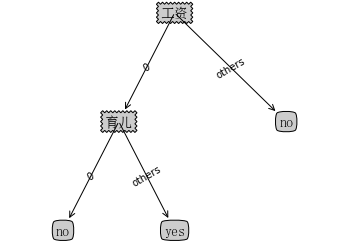

In [5]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
 
 #定义文本框和箭头格式
decisionNode=dict(boxstyle='sawtooth',fc='0.8')
leafNode=dict(boxstyle='round4',fc='0.8')
arrow_args=dict(arrowstyle='<-')
#设置中文字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
 
 
"""
函数说明:获取决策树叶子结点的数目
Parameters:
    myTree - 决策树
Returns:
    numLeafs - 决策树的叶子结点的数目
"""
def getNumLeafs(myTree):
    numLeafs = 0                   #初始化叶子
    # python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，
    # 可以使用list(myTree.keys())[0]
    firstStr = next(iter(myTree))
    secondDict = myTree[firstStr]                      #获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':     #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs +=1
    return numLeafs
 
 
"""
函数说明:获取决策树的层数
Parameters:
    myTree - 决策树
Returns:
    maxDepth - 决策树的层数
"""
def getTreeDepth(myTree):
    maxDepth = 0                                  #初始化决策树深度
    # python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，
    # 可以使用list(myTree.keys())[0]
    firstStr = next(iter(myTree))
    secondDict = myTree[firstStr]                          #获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':         #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth      #更新层数
    return maxDepth
 
 
"""
函数说明:绘制结点
Parameters:
    nodeTxt - 结点名
    centerPt - 文本位置
    parentPt - 标注的箭头位置
    nodeType - 结点格式
"""
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")                                          #定义箭头格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)        #设置中文字体
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',    #绘制结点
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args,fontproperties=font)
 
 
"""
函数说明:标注有向边属性值
Parameters:
    cntrPt、parentPt - 用于计算标注位置
    txtString - 标注的内容
"""
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]                               #计算标注位置
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)
 
 
"""
函数说明:绘制决策树
Parameters:
    myTree - 决策树(字典)
    parentPt - 标注的内容
    nodeTxt - 结点名
"""
def plotTree(myTree, parentPt, nodeTxt):
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")                                    #设置结点格式
    leafNode = dict(boxstyle="round4", fc="0.8")                                          #设置叶结点格式
    numLeafs = getNumLeafs(myTree)                                                        #获取决策树叶结点数目，决定了树的宽度
    depth = getTreeDepth(myTree)                                                          #获取决策树层数
    firstStr = next(iter(myTree))                                                         #下个字典
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff) #中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)                                                #标注有向边属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)                                    #绘制结点
    secondDict = myTree[firstStr]                                                         #下一个字典，也就是继续绘制子结点
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD                                   #y偏移
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                 #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))              #不是叶结点，递归调用继续绘制
        else:                                                      #如果是叶结点，绘制叶结点，并标注有向边属性值
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
 
 
"""
函数说明:创建绘制面板
Parameters:
    inTree - 决策树(字典)
"""
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')                               #创建fig
    fig.clf()                                                            #清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)          #去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))                         #获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))                        #获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;           #x偏移
    plotTree(inTree, (0.5,1.0), '')                                      #绘制决策树
    plt.show()
 
 
if __name__=='__main__':
    mytree={'工资': {0: {'育儿': {0: 'no', 'others': 'yes'}}, 'others': 'no'}}
    createPlot(mytree)

In [11]:
from math import log
    
# 构造数据集
def create_dataset():
    dataset = [[1,1,2,'no'],
               [0,1,0,'no'],
               [1,0,0,'no'],
               [1,1,0,'no'],
               [0,1,1,'yes'],
               [1,1,1,'no'],
               [0,0,2,'yes'],
               [0,0,1,'yes']]
    labels = ['工资', '婚姻', '育儿']
    return dataset, labels

# 计算当前集合的Gini系数
def calcGini(dataset):
    # 求总样本数
    num_of_examples = len(dataset)
    labelCnt = {}
    # 遍历整个样本集合
    for example in dataset:
        # 当前样本的标签值是该列表的最后一个元素
        currentLabel = example[-1]
        # 统计每个标签各出现了几次
        if currentLabel not in labelCnt.keys():
            labelCnt[currentLabel] = 0
        labelCnt[currentLabel] += 1
    # 得到了当前集合中每个标签的样本个数后，计算它们的p值
    for key in labelCnt:
        labelCnt[key] /= num_of_examples
        labelCnt[key] = labelCnt[key] * labelCnt[key]
    # 计算Gini系数
    Gini = 1 - sum(labelCnt.values())
    return Gini
    
# 提取子集合
# 功能：从dataSet中先找到所有第axis个标签值 = value的样本
# 然后将这些样本删去第axis个标签值，再全部提取出来成为一个新的样本集
def create_sub_dataset(dataset, index, value):
    sub_dataset = []
    for example in dataset:
        current_list = []
        if example[index] == value:
            current_list = example[:index]
            current_list.extend(example[index + 1 :])
            sub_dataset.append(current_list)
    return sub_dataset

# 将当前样本集分割成特征i取值为value的一部分和取值不为value的一部分（二分）
def split_dataset(dataset, index, value):
    sub_dataset1 = []
    sub_dataset2 = []
    for example in dataset:
        current_list = []
        if example[index] == value:
            current_list = example[:index]
            current_list.extend(example[index + 1 :])
            sub_dataset1.append(current_list)
        else:
            current_list = example[:index]
            current_list.extend(example[index + 1 :])
            sub_dataset2.append(current_list)
    return sub_dataset1, sub_dataset2

def choose_best_feature(dataset):
    # 特征总数
    numFeatures = len(dataset[0]) - 1
    # 当只有一个特征时
    if numFeatures == 1:
        return 0
    # 初始化最佳基尼系数
    bestGini = 1
    # 初始化最优特征
    index_of_best_feature = -1
    # 遍历所有特征，寻找最优特征和该特征下的最优切分点
    for i in range(numFeatures):
        # 去重，每个属性值唯一
        uniqueVals = set(example[i] for example in dataset)
        # Gini字典中的每个值代表以该值对应的键作为切分点对当前集合进行划分后的Gini系数
        Gini = {}
        # 对于当前特征的每个取值
        for value in uniqueVals:
            # 先求由该值进行划分得到的两个子集
            sub_dataset1, sub_dataset2 = split_dataset(dataset,i,value)
            # 求两个子集占原集合的比例系数prob1 prob2
            prob1 = len(sub_dataset1) / float(len(dataset))
            prob2 = len(sub_dataset2) / float(len(dataset))
            # 计算子集1的Gini系数
            Gini_of_sub_dataset1 = calcGini(sub_dataset1)
            # 计算子集2的Gini系数
            Gini_of_sub_dataset2 = calcGini(sub_dataset2)
            # 计算由当前最优切分点划分后的最终Gini系数
            Gini[value] = prob1 * Gini_of_sub_dataset1 + prob2 * Gini_of_sub_dataset2
            # 更新最优特征和最优切分点
            if Gini[value] < bestGini:
                bestGini = Gini[value]
                index_of_best_feature = i
                best_split_point = value
    return index_of_best_feature, best_split_point
    
# 返回具有最多样本数的那个标签的值（'yes' or 'no'）
def find_label(classList):
    # 初始化统计各标签次数的字典
    # 键为各标签，对应的值为标签出现的次数
    labelCnt = {}
    for key in classList:
        if key not in labelCnt.keys():
            labelCnt[key] = 0
        labelCnt[key] += 1
    # 将classCount按值降序排列
    # 例如：sorted_labelCnt = {'yes': 9, 'no': 6}
    sorted_labelCnt = sorted(labelCnt.items(), key = lambda a:a[1], reverse = True)
    # 下面这种写法有问题
    # sortedClassCount = sorted(labelCnt.iteritems(), key=operator.itemgetter(1), reverse=True)
    # 取sorted_labelCnt中第一个元素中的第一个值，即为所求
    return sorted_labelCnt[0][0]
    
    
def create_decision_tree(dataset, features):
    # 求出训练集所有样本的标签
    # 对于初始数据集，其label_list = ['no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
    label_list = [example[-1] for example in dataset]
    # 先写两个递归结束的情况：
    # 若当前集合的所有样本标签相等（即样本已被分“纯”）
    # 则直接返回该标签值作为一个叶子节点
    if label_list.count(label_list[0]) == len(label_list):
        return label_list[0]
    # 若训练集的所有特征都被使用完毕，当前无可用特征，但样本仍未被分“纯”
    # 则返回所含样本最多的标签作为结果
    if len(dataset[0]) == 1:
        return find_label(label_list)
    # 下面是正式建树的过程
    # 选取进行分支的最佳特征的下标和最佳切分点
    index_of_best_feature, best_split_point = choose_best_feature(dataset)
    # 得到最佳特征
    best_feature = features[index_of_best_feature]
    # 初始化决策树
    decision_tree = {best_feature: {}}
    # 使用过当前最佳特征后将其删去
    del(features[index_of_best_feature])
    # 子特征 = 当前特征（因为刚才已经删去了用过的特征）
    sub_labels = features[:]
    # 递归调用create_decision_tree去生成新节点
    # 生成由最优切分点划分出来的二分子集
    sub_dataset1, sub_dataset2 = split_dataset(dataset,index_of_best_feature,best_split_point)
    # 构造左子树
    decision_tree[best_feature][best_split_point] = create_decision_tree(sub_dataset1, sub_labels)
    # 构造右子树
    decision_tree[best_feature]['others'] = create_decision_tree(sub_dataset2, sub_labels)
    return decision_tree
    
# 用上面训练好的决策树对新样本分类
def classify(decision_tree, features, test_example):
    # 根节点代表的属性
    first_feature = list(decision_tree.keys())[0]
    # second_dict是第一个分类属性的值（也是字典）
    second_dict = decision_tree[first_feature]
    # 树根代表的属性，所在属性标签中的位置，即第几个属性
    index_of_first_feature = features.index(first_feature)
    # 对于second_dict中的每一个key
    for key in second_dict.keys():
        # 不等于'others'的key
        if key != 'others':
            if test_example[index_of_first_feature] == key:
            # 若当前second_dict的key的value是一个字典
                if type(second_dict[key]).__name__ == 'dict':
                    # 则需要递归查询
                    classLabel = classify(second_dict[key], features, test_example)
                # 若当前second_dict的key的value是一个单独的值
                else:
                    # 则就是要找的标签值
                    classLabel = second_dict[key]
            # 如果测试样本在当前特征的取值不等于key，就说明它在当前特征的取值属于'others'
            else:
                # 如果second_dict['others']的值是个字符串，则直接输出
                if isinstance(second_dict['others'],str):
                    classLabel = second_dict['others']
                # 如果second_dict['others']的值是个字典，则递归查询
                else:
                    classLabel = classify(second_dict['others'], features, test_example)
    return classLabel
    
if __name__ == '__main__':
    dataset, features = create_dataset()
    decision_tree = create_decision_tree(dataset, features)
    # 打印生成的决策树
    print(decision_tree)
    # 对新样本进行分类测试
    #features = ['age', 'work', 'house', 'credit']
    #test_example = ['midlife', 'yes', 'no', 'great']
    #print(classify(decision_tree, features, test_example))


{'工资': {0: {'育儿': {0: 'no', 'others': 'yes'}}, 'others': 'no'}}


$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$

$macroF1 = \frac{2\times macroP\times macroR}{macroP+macroR}$

$$macroP = \frac{1}{n}\sum^n_1P_i$$
$$macroR = \frac{1}{n}\sum^n_1R_i$$

$FPS = \frac{frameNum}{elapsedTime}$